In [141]:
from matplotlib import pyplot as plt
import heapq as pq
import re
import numpy as np
import math

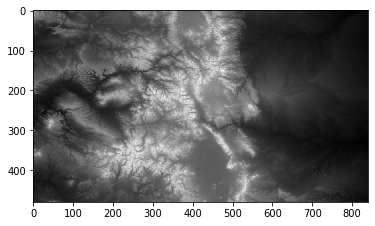

In [142]:
with open("Colorado_844x480.dat") as f:
  s = f.read()
s = [int(i) for i in re.split("\s+", s)[1:]]
arr = []
for i in range(0, len(s), 840):
  arr.append(s[i:i+840])
arr = np.array(arr)
highest = arr.max()
lowest = arr.min()
scaled = (arr - lowest) / highest * 255
plt.imshow(scaled, cmap="gray", interpolation="nearest")
plt.show()

In [143]:
class TileWrapper:

  def __init__(self, r, c, value):
    self.r = r
    self.c = c
    self.value = value
  
  def __le__(self, other):
    return (self.value) <= (other.value)
  
  def __ge__(self, other):
    return self.value >= other.value
  
  def __lt__(self, other):
    return self.value < other.value
  
  def __gt__(self, other):
    return self.value > other.value
  
  def __eq__(self, other):
    return self.r == other.r and self.c == other.c

In [144]:
def neighbors(r, c):
  potential = [(r - 1, c - 1), (r - 1, c), (r - 1, c + 1),
               (r, c - 1), (r, c + 1),
               (r + 1, c - 1), (r + 1, c), (r + 1, c + 1)
               ]
  ans = []
  for i in potential:
    if not ((-1 in i) or i[0] == 480 or i[1] == 840):
      ans.append(i)
  return ans

In [161]:
heuristic = lambda curr, dest : 0#math.sqrt((curr[0] - dest[0]) ** 2 + (curr[1] - dest[1]) ** 2)
dist = lambda a, b : abs(arr[a[0], a[1]] - arr[b[0], b[1]])
# Start as (r, c) tuple, heuristic takes (r, c) tuple
def a_star(start, stop):
  open = [TileWrapper(*start, heuristic(start, stop))]
  g = {start : 0}
  h = {start : heuristic(start, stop)}
  values = {start : heuristic(start, stop)}
  cameFrom = {start : None}
  open_set = set()
  open_set.add(start)
  while open:
    current = pq.heappop(open)
    current = (current.r, current.c)
    open_set.remove(current)
    if current == stop:
      return reconstruct_path(stop, cameFrom)
    for neighbor in neighbors(*current):
      tentative_g = g[current] + dist(current, neighbor)
      if tentative_g < g.get(neighbor, math.inf):
        cameFrom[neighbor] = current
        g[neighbor] = tentative_g
        values[neighbor] = tentative_g + heuristic(neighbor, stop)
        if neighbor not in open_set:
          pq.heappush(open, TileWrapper(*neighbor, values[neighbor]))
          open_set.add(neighbor)
  return None


In [150]:
def reconstruct_path(stop, cameFrom):
  path = [stop]
  while stop is not None:
    stop = cameFrom[stop]
    path.append(stop)
  return path[:-1][::-1]

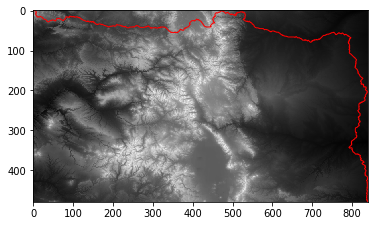

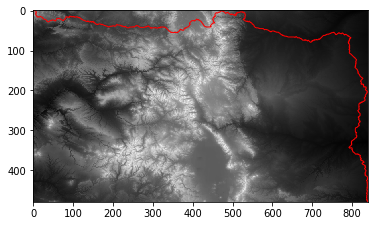

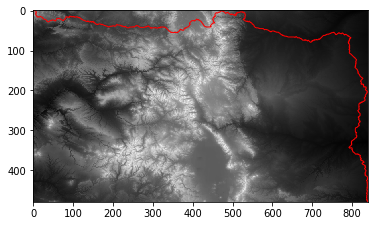

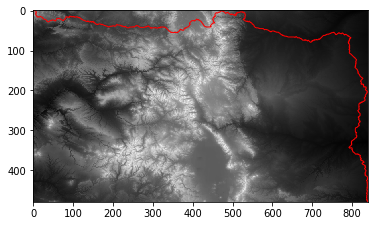

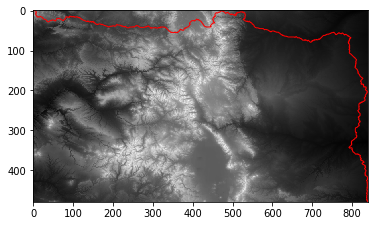

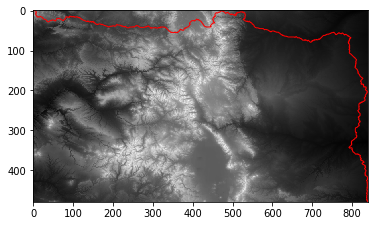

1 loop, best of 5: 12.7 s per loop


In [163]:
%%timeit
def plot_path(path):
  x = [i[1] for i in path]
  y = [i[0] for i in path]
  plt.plot(x, y, color="red", linewidth=1)

plt.imshow(scaled, cmap="gray", interpolation="nearest")
plot_path(a_star((0, 0), (479, 839)))
plt.show()